In [ ]:
!pip install "tensorflow-gpu>=1.15.2,<2.0"
!pip install ampligraph

     |████████████████████████████████| 411.0 MB 21 kB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 3.8 MB 69.0 MB/s 
     |████████████████████████████████| 503 kB 62.2 MB/s 
     |████████████████████████████████| 2.9 MB 58.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=940f6a560e9a7493e676ed97423503f78cf35dea8860aa1c9cfab5b4bbcaddf9
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tenso

     |████████████████████████████████| 168 kB 5.0 MB/s 
     |████████████████████████████████| 482 kB 53.8 MB/s 
     |████████████████████████████████| 6.4 MB 62.4 MB/s 
     |████████████████████████████████| 64 kB 1.8 MB/s 
     |████████████████████████████████| 2.7 MB 32.0 MB/s 
     |████████████████████████████████| 120 kB 61.5 MB/s 
     |████████████████████████████████| 561 kB 46.3 MB/s 
     |████████████████████████████████| 69 kB 6.9 MB/s 
     |████████████████████████████████| 42 kB 818 kB/s 
     |████████████████████████████████| 41 kB 508 kB/s 
     |████████████████████████████████| 100 kB 9.6 MB/s 
     |████████████████████████████████| 84 kB 1.2 MB/s 
     |████████████████████████████████| 121 kB 43.7 MB/s 
     |████████████████████████████████| 90 kB 8.9 MB/s 
  Created wheel for commonmark: filename=CommonMark-0.5.4-py3-none-any.whl size=30768 sha256=b3c711f910f1db571cc4ad96556e310ddd3327b0aedbec5a9599c18287ad41e6
  Stored in directory: /root/.cache/pip/whee

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import ampligraph

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/coi_triple_160.csv')

In [ ]:
df.isna().sum()

Unnamed: 0      0
COI             0
Subject       166
Relation        0
Object          4
Confidence      0
dtype: int64

In [ ]:
df = df.dropna()
df = df.drop('Unnamed: 0', axis=1)
df

COI                      Subject                Relation  \
0           0                      B. Ward                     are   
1           0                      B. Ward                     are   
2           0                  V. Teixeira        are employees of   
3           0                      B. Ward                     are   
4           0                  V. Teixeira                     are   
...       ...                          ...                     ...   
585054  49409  Novartis Influenza Vaccines         was acquired by   
585055  49409  Novartis Influenza Vaccines  currently operating as   
585056  49409                          AKA                    were   
585057  49409  Novartis Influenza Vaccines            operating as   
585058  49409                          AKA                    were   

                                                   Object  Confidence  
0                        employees of Respiratory Society         1.0  
1                                               employees         1.0  
2                                                 Society         1.0  
3                           employees of European Society         1.0  
4                                               employees         1.0  
...                                                   ...         ...  
585054                                          CSL group         1.0  
585055                                            Seqirus         1.0  
585056  employed by sponsor Novartis at time of study ...         1.0  
585057                                            Seqirus         1.0  
585058               employed by sponsor Novartis at time         1.0  

[584889 rows x 5 columns]

In [ ]:
df.nunique()

COI            37316
Subject        48734
Relation       20562
Object        166127
Confidence      3479
dtype: int64

In [ ]:
df_triple = df[['Subject', 'Relation', 'Object']]
df_triple = df_triple.drop_duplicates()
df_triple

Subject                 Relation                            Object
0           B. Ward                      are  employees of Respiratory Society
1           B. Ward                      are                         employees
2       V. Teixeira         are employees of                           Society
3           B. Ward                      are     employees of European Society
4       V. Teixeira                      are                         employees
...             ...                      ...                               ...
583285    Z. Ballas  receives royalties with                            claims
583495            I       did participate in                          drafting
583496            I       did participate in            drafting of guidelines
585049     Dr Green                       is                         cofounder
585051     Dr Green                       is                        co-founder

[389096 rows x 3 columns]

In [ ]:
df_triple.isnull().sum()

Subject     0
Relation    0
Object      0
dtype: int64

In [ ]:
rel_unique = df_triple['Relation'].unique()
len(rel_unique)

20562

In [ ]:
df_unique = df_triple.drop_duplicates(subset=['Relation'])
df_unique

Subject                     Relation  \
0                 B. Ward                          are   
2             V. Teixeira             are employees of   
14            C. Gratziou                Secretary for   
15            C. Gratziou                           is   
16               Lecturer                           ’s   
...                   ...                          ...   
582862                 he                served Within   
582960                 He    also receives grants from   
582994          Dr Kaplan           has received grant   
583268  E. Jensen Jarolim  received lectgure fees from   
583276          Z. Ballas      receives royalties with   

                                                 Object  
0                      employees of Respiratory Society  
2                                               Society  
14                                           EU Affairs  
15                           ERS Advocacy Council Chair  
16      fees from Kowa Pharmaceutical unrelated to work  
...                                                 ...  
582862                                        past year  
582960                                          Frances  
582994                  Pfizer Dr Marquez has indicated  
583268                                          Bencard  
583276                    jurisdictional claims in maps  

[20562 rows x 3 columns]

# Ampligraph

In [ ]:
from ampligraph.evaluation import train_test_split_no_unseen

X_train, X_valid = train_test_split_no_unseen(np.array(df_triple), test_size=0.02)

In [ ]:
print('Train set size: ', X_train.shape)
print('Test set size: ', X_valid.shape)

Train set size:  (381315, 3)
Test set size:  (7781, 3)


In [ ]:
from ampligraph.latent_features import ComplEx

model = ComplEx(batches_count=50,
                epochs=300,
                k=100,
                eta=20,
                optimizer='adam', 
                optimizer_params={'lr':1e-4},
                loss='multiclass_nll',
                regularizer='LP', 
                regularizer_params={'p':3, 'lambda':1e-5}, 
                seed=0, 
                verbose=True)

In [ ]:
tf.logging.set_verbosity(tf.logging.ERROR)

model.fit(X_train)

Average ComplEx Loss:   0.020191: 100%|██████████| 300/300 [10:55<00:00,  2.18s/epoch]


In [ ]:
from ampligraph.evaluation import evaluate_performance

ranks = evaluate_performance(X_valid,
                             model=model, 
                             filter_triples=filter_triples,
                             use_default_protocol=True,
                             verbose=True)

WARNING - DeprecationWarning: use_default_protocol will be removed in future. Please use corrupt_side argument instead.
ERROR - Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/ampligraph/evaluation/protocol.py", line 876, in evaluate_performance
    dataset_handle.set_filter(filter_triples)
  File "/usr/local/lib/python3.7/dist-packages/ampligraph/datasets/numpy_adapter.py", line 207, in set_filter
    self.filter_adapter.set_data(filter_triples, "filter", mapped_status)
  File "/usr/local/lib/python3.7/dist-packages/ampligraph/datasets/sqlite_adapter.py", line 382, in set_data
    self.map_data()
  File "/usr/local/lib/python3.7/dist-packages/ampligraph/datasets/sqlite_adapter.py", line 257, in map_data
    self._insert_triples(self.dataset[key], key)
  File "/usr/local/lib/python3.7/dist-packages/ampligraph/datasets/sqlite_adapter.py", line 229, in _insert_

TypeError: ignored

In [ ]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

mr = mr_score(ranks)
mrr = mrr_score(ranks)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

## Clustering and embedding visualization

In [ ]:
ontology = pd.read_csv('/content/drive/MyDrive/AI in Health Conflict of Interest project/coi_gt_ontology.csv')

In [ ]:
ontology

In [ ]:
ontology['COI Desc'].nunique()

In [ ]:
ontology[ontology['COI Desc']=='stock']

In [ ]:
# concatenate the string

ot = ontology[['COI Desc', 'COI term']].drop_duplicates()  

ot['COI term'] = ot.groupby(['COI Desc']).transform(lambda x : ', '.join(x))
ot.drop_duplicates().reset_index(drop=True)

In [ ]:
pip install seaborn adjustText

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
%matplotlib inline

In [ ]:
entity = pd.concat((df.Subject, df.Object)).unique()
entity_embeddings = dict(zip(entity, model.get_embeddings(entity)))

In [ ]:
embeddings_2d = PCA(n_components=2).fit_transform(np.array([i for i in entity_embeddings.values()]))

In [ ]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans

clustering_algorithm = KMeans(n_clusters=21, n_init=50, max_iter=500, random_state=0)
clusters = find_clusters(entity, model, clustering_algorithm, mode='entity')

In [ ]:
plot_df = pd.DataFrame({"entity": entity, 
                        "embedding1": embeddings_2d[:, 0], 
                        "embedding2": embeddings_2d[:, 1],
                        "cluster": "cluster" + pd.Series(clusters).astype(str)})

In [ ]:
plot_df.cluster.value_counts()

cluster10    34441
cluster9     29181
cluster17    23119
cluster18    22326
cluster16    20198
cluster15    14258
cluster12    13118
cluster13     8629
cluster3      5844
cluster5      5705
cluster8      3900
cluster2      3810
cluster14     3571
cluster6      3564
cluster7      3549
cluster1      3478
cluster20     2604
cluster0      2448
cluster11     1871
cluster19     1371
cluster4       621
Name: cluster, dtype: int64

In [ ]:
relation = df.Relation.unique()
relation_embeddings = dict(zip(relation, model.get_embeddings(relation, embedding_type='relation')))

In [ ]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans

clustering_algorithm = KMeans(n_clusters=21, n_init=50, max_iter=500, random_state=0)
rel_clusters = find_clusters(relation, model, clustering_algorithm, mode='relation')

In [ ]:
rel_embeddings_2d = PCA(n_components=2).fit_transform(np.array([i for i in relation_embeddings.values()]))

In [ ]:
plot_rel = pd.DataFrame({"relation": relation, 
                        "embedding1": rel_embeddings_2d[:, 0], 
                        "embedding2": rel_embeddings_2d[:, 1],
                        "cluster": "cluster" + pd.Series(rel_clusters).astype(str)})

In [ ]:
plot_rel.cluster.value_counts()

In [ ]:
plot_rel

relation  embedding1  embedding2    cluster
0                              are   -0.088873   -1.551205   cluster0
1                 are employees of    3.104137    6.122596   cluster6
2                    Secretary for   -1.064681    0.394084  cluster15
3                               is    0.354255    0.512837  cluster11
4                               ’s   -1.194705    0.815759   cluster3
...                            ...         ...         ...        ...
20557                served Within    0.017819   -0.231573  cluster16
20558    also receives grants from   -0.127577    0.293386  cluster19
20559           has received grant    0.901302   -0.037116  cluster20
20560  received lectgure fees from    1.214881   -0.650509  cluster20
20561      receives royalties with   -0.116626   -0.695756  cluster17

[20562 rows x 4 columns]

In [ ]:
def plot_clusters(hue):
    np.random.seed(0)
    plt.figure(figsize=(12, 12))
    plt.title("{} embeddings".format(hue).capitalize())
    ax = sns.scatterplot(data=plot_df, x="embedding1", y="embedding2", hue=hue)
    texts = []
    for i, point in plot_df.iterrows():
      texts.append(plt.text(point['embedding1']+0.02, point['embedding2']+0.01, str(point["entity"])))
    adjust_text(texts)

In [ ]:
plot_clusters("cluster")

In [ ]:
plot_rel

relation  embedding1  embedding2    cluster
0                              are   -0.088873   -1.551205   cluster0
1                 are employees of    3.104137    6.122596   cluster6
2                    Secretary for   -1.064681    0.394084  cluster15
3                               is    0.354255    0.512837  cluster11
4                               ’s   -1.194705    0.815759   cluster3
...                            ...         ...         ...        ...
20557                served Within    0.017819   -0.231573  cluster16
20558    also receives grants from   -0.127577    0.293386  cluster19
20559           has received grant    0.901302   -0.037116  cluster20
20560  received lectgure fees from    1.214881   -0.650509  cluster20
20561      receives royalties with   -0.116626   -0.695756  cluster17

[20562 rows x 4 columns]

In [ ]:
plot = plot_rel[['cluster', 'relation']]
plot['relation'] = plot.groupby(['cluster']).transform(lambda x : ', '.join(x))
plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


cluster                                           relation
0       cluster0  are, served as, has served as, attend, receivi...
1       cluster6  are employees of, fees from, is consultant for...
2      cluster15  Secretary for, is owned enterprise in, is ente...
3      cluster11  is, has acted as, was, been, serves as, acts a...
4       cluster3  ’s, has, has pending, also has, However has, A...
...          ...                                                ...
20557  cluster16  developed at, have read, are as, is co-investi...
20558  cluster19  Sechi per, providing marketing services to, is...
20559  cluster20  is in, accepted travel for, is Director of, co...
20560  cluster20  is in, accepted travel for, is Director of, co...
20561  cluster17  was funded by, of onset is, provided support i...

[20562 rows x 2 columns]

In [ ]:
pt = plot.drop_duplicates()

In [ ]:
pt

cluster                                           relation
0     cluster0  are, served as, has served as, attend, receivi...
1     cluster6  are employees of, fees from, is consultant for...
2    cluster15  Secretary for, is owned enterprise in, is ente...
3    cluster11  is, has acted as, was, been, serves as, acts a...
4     cluster3  ’s, has, has pending, also has, However has, A...
5     cluster4  member for, brought, revised manuscript along,...
6     cluster2  grants from, received consultancy honoraria fr...
8    cluster12  from grants is, has undertaken, accepted, rece...
9    cluster13                              reports, also reports
10    cluster7  from Topcon is, has filed, received funding in...
11    cluster5  have, has filed patent applications on, was sp...
12   cluster20  is in, accepted travel for, is Director of, co...
14   cluster16  developed at, have read, are as, is co-investi...
15   cluster17  was funded by, of onset is, provided support i...
18   cluster18  has undertaken research under, grants outside,...
20    cluster1  is with, will, is related to, was supported by...
32   cluster19  Sechi per, providing marketing services to, is...
56    cluster8  approved, to, participate in, provided support...
65    cluster9  brought concern about, has patent applications...
80   cluster14  served in, is on, been on, serves on, is non-e...
147  cluster10  holds, also holds, now holds, holds ®, Not app...

In [ ]:
type(pt.relation[0])

str

In [ ]:
check = 'for'
presence = []
for c in pt.cluster:
  presence.append(pt[pt.cluster==c].relation.to_string().find(check))

In [ ]:
dict(zip(pt.cluster, presence))

{'cluster0': -1,
 'cluster1': -1,
 'cluster10': -1,
 'cluster11': -1,
 'cluster12': -1,
 'cluster13': -1,
 'cluster14': -1,
 'cluster15': 15,
 'cluster16': -1,
 'cluster17': -1,
 'cluster18': -1,
 'cluster19': -1,
 'cluster2': -1,
 'cluster20': 29,
 'cluster3': -1,
 'cluster4': 12,
 'cluster5': -1,
 'cluster6': 48,
 'cluster7': -1,
 'cluster8': -1,
 'cluster9': -1}

In [ ]:
pt[pt.cluster=='cluster15'].relation.to_textfile().find('employee')

AttributeError: ignored

In [ ]:
len(pt[pt.cluster=='cluster15'].relation.to_string())

54

In [ ]:
pt

cluster                                           relation
0     cluster0  are, served as, has served as, attend, receivi...
1     cluster6  are employees of, fees from, is consultant for...
2    cluster15  Secretary for, is owned enterprise in, is ente...
3    cluster11  is, has acted as, was, been, serves as, acts a...
4     cluster3  ’s, has, has pending, also has, However has, A...
5     cluster4  member for, brought, revised manuscript along,...
6     cluster2  grants from, received consultancy honoraria fr...
8    cluster12  from grants is, has undertaken, accepted, rece...
9    cluster13                              reports, also reports
10    cluster7  from Topcon is, has filed, received funding in...
11    cluster5  have, has filed patent applications on, was sp...
12   cluster20  is in, accepted travel for, is Director of, co...
14   cluster16  developed at, have read, are as, is co-investi...
15   cluster17  was funded by, of onset is, provided support i...
18   cluster18  has undertaken research under, grants outside,...
20    cluster1  is with, will, is related to, was supported by...
32   cluster19  Sechi per, providing marketing services to, is...
56    cluster8  approved, to, participate in, provided support...
65    cluster9  brought concern about, has patent applications...
80   cluster14  served in, is on, been on, serves on, is non-e...
147  cluster10  holds, also holds, now holds, holds ®, Not app...

In [ ]:
pt.to_csv('/content/drive/MyDrive/AI in Health Conflict of Interest project/kg_cluster.csv')

In [ ]:
rel_group = plot_rel.groupby(['cluster'])


In [ ]:
rel_group.get_group('cluster0')

relation  embedding1  embedding2   cluster
0                            are   -0.088873   -1.551205  cluster0
496                    receiving    0.429890    0.560873  cluster0
2615        previously served as    0.630298   -0.905549  cluster0
5298            are co-inventors    0.356247   -1.376768  cluster0
1988            have applied for    0.810347   -1.494988  cluster0
1004              have served as    1.480458   -0.388591  cluster0
1012         receives funding as    0.414398   -0.195093  cluster0
10135     occasionally served as    0.422246   -0.419116  cluster0
303                       attend    0.309878   -0.051044  cluster0
3328          has also served as    0.494286   -0.510010  cluster0
6243    has previously served as    0.147372   -0.506660  cluster0
1890                    reported   -1.072685    0.021107  cluster0
4623   have previously served as    0.570670   -0.297161  cluster0
8845              Soon conducted   -0.170575   -0.083878  cluster0
16856             Here conducted   -0.319349   -0.429346  cluster0
81                     served as    0.693540   -1.082448  cluster0
9383                are founding    0.709280   -1.045481  cluster0
3660                   conducted   -0.017985   -0.508693  cluster0
1011    also receives funding as    0.346974   -0.207845  cluster0
7287        previously conducted    0.072234   -0.484803  cluster0
3914              also served as    0.494875   -0.448053  cluster0
268                has served as    0.278221   -0.850282  cluster0

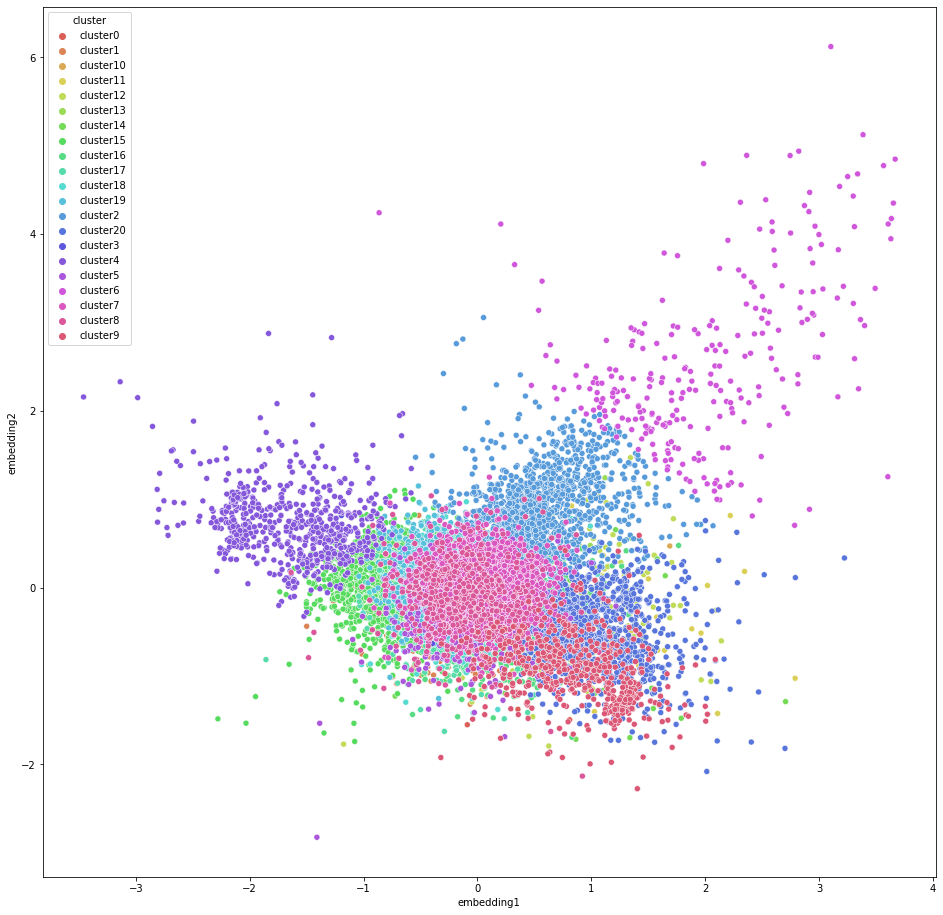

In [ ]:
plt.figure(figsize=(16,16))
sns.scatterplot(x=plot_rel.embedding1,y=plot_rel.embedding2,hue='cluster',palette=sns.color_palette("hls",21),data=plot_rel,
               legend="full")
plt.show()

In [ ]:
import networkx as nx

In [ ]:
G=nx.from_pandas_edgelist(df[df['Relation']=='is employee of'], "Subject", "Object", edge_attr=True, create_using=nx.DiGraph())

In [ ]:
sub = dict(zip(list(df.Subject), list(np.zeros(len(df.Subject)))))
obj = dict(zip(list(df.Object), list(np.ones(len(df.Object)))))

In [ ]:
sub.update(obj)

In [ ]:
values = [sub.get(node, 0.5) for node in G.nodes()]

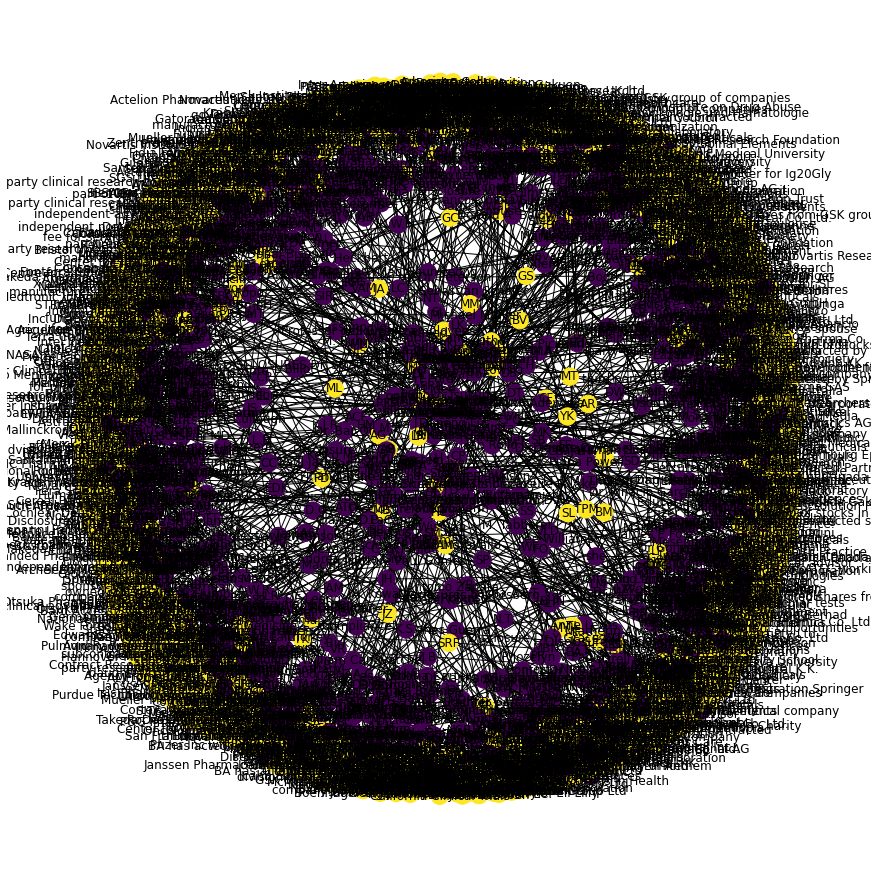

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color=values, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
df[df.Relation=='is employee of'].groupby('Object').count().sort_values('Subject', ascending=False)

Unnamed: 0  COI  Subject  Relation  \
Object                                                                     
Inc.                                          72   72       72        72   
AstraZeneca                                   54   54       54        54   
Boehringer                                    30   30       30        30   
GSK                                           28   28       28        28   
University                                    24   24       24        24   
...                                          ...  ...      ...       ...   
J MM                                           1    1        1         1   
JBC Consulting                                 1    1        1         1   
JZ                                             1    1        1         1   
Janssen Biotech                                1    1        1         1   
wholly owned subsidiary of Eli Lilly           1    1        1         1   

                                      Confidence  
Object                                            
Inc.                                          72  
AstraZeneca                                   54  
Boehringer                                    30  
GSK                                           28  
University                                    24  
...                                          ...  
J MM                                           1  
JBC Consulting                                 1  
JZ                                             1  
Janssen Biotech                                1  
wholly owned subsidiary of Eli Lilly           1  

[1328 rows x 5 columns]

In [ ]:
filter_triples = np.concatenate((X_train, X_valid))

In [ ]:
G=nx.from_pandas_edgelist(df[df['Relation']=='is employee of'and df['Object']=='is employee of'], "Subject", "Object", edge_attr=True, create_using=nx.MultiDiGraph())

ValueError: ignored

In [ ]:
az = df[(df['Relation']=='is employee of')& (df['Object']=='AstraZeneca')]

In [ ]:
df.head()

Unnamed: 0  COI      Subject          Relation  \
0           0    0      B. Ward               are   
1           1    0      B. Ward               are   
2           2    0  V. Teixeira  are employees of   
3           3    0      B. Ward               are   
4           4    0  V. Teixeira               are   

                             Object  Confidence  
0  employees of Respiratory Society         1.0  
1                         employees         1.0  
2                           Society         1.0  
3     employees of European Society         1.0  
4                         employees         1.0

In [ ]:
G=nx.from_pandas_edgelist(az, "Subject", "Object", edge_attr=True, create_using=nx.MultiDiGraph())

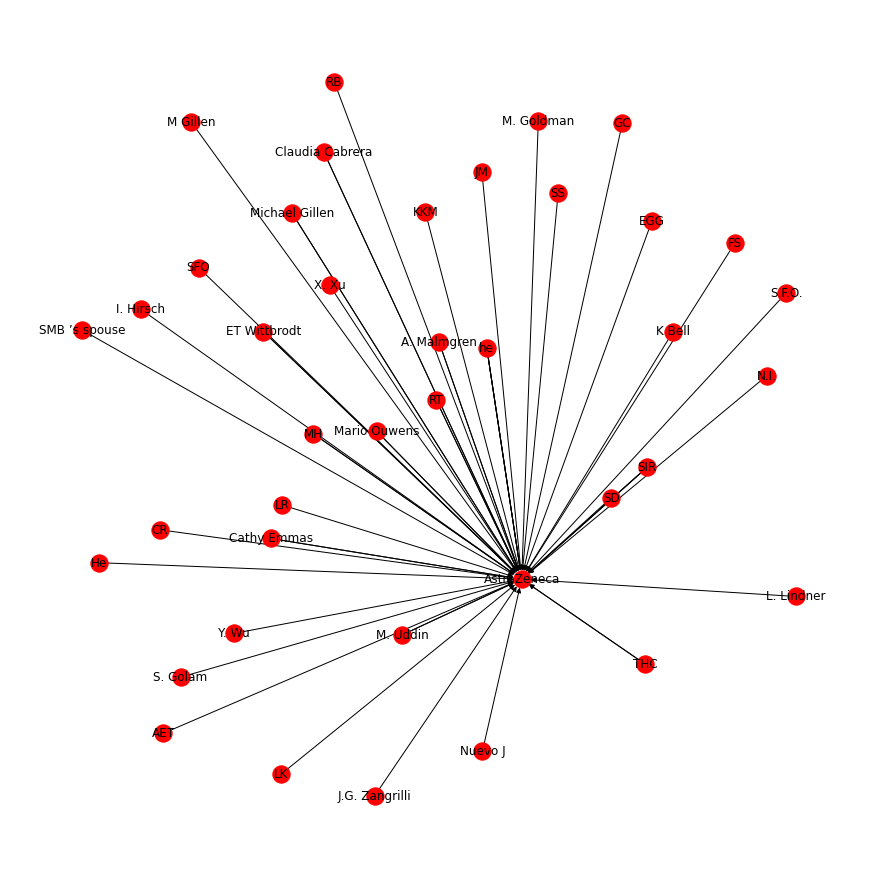

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()



```
# This is formatted as code
```

# New attempt

In [ ]:
from ampligraph.latent_features import ComplEx

complEx_unique = ComplEx(batches_count=50,
                epochs=300,
                k=100,
                eta=20,
                optimizer='adam', 
                optimizer_params={'lr':1e-4},
                loss='multiclass_nll',
                regularizer='LP', 
                regularizer_params={'p':3, 'lambda':1e-5}, 
                seed=0, 
                verbose=True)

In [ ]:
tf.logging.set_verbosity(tf.logging.ERROR)

complEx_unique.fit(np.array(df_unique))

Average ComplEx Loss:   0.224924: 100%|██████████| 300/300 [01:44<00:00,  2.86epoch/s]


In [ ]:
from ampligraph.latent_features import TransE

transE_unique = TransE(batches_count=1, 
                seed=555, 
                epochs=20, 
                k=10, 
                loss='pairwise',
                loss_params={'margin':5})

WARNING - All triples will be processed in the same batch (batches_count=1). When processing large graphs it is recommended to batch the input knowledge graph instead.


In [ ]:
tf.logging.set_verbosity(tf.logging.ERROR)

transE_unique.fit(np.array(df_triple))

In [ ]:
rel_transE_embeddings = dict(zip(relation, transE_unique.get_embeddings(relation, embedding_type='relation')))

In [ ]:
relation = df.Relation.unique()
relation_embeddings = dict(zip(relation, model.get_embeddings(relation, embedding_type='relation')))

In [ ]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans

clustering_algorithm = KMeans(n_clusters=21, n_init=50, max_iter=500, random_state=0)
rel_clusters_transE = find_clusters(relation, transE_unique, clustering_algorithm, mode='relation')

In [ ]:
rel_transE_embeddings_2d = PCA(n_components=2).fit_transform(np.array([i for i in rel_transE_embeddings.values()]))

In [ ]:
plot_rel_transE = pd.DataFrame({"relation": relation, 
                        "embedding1": rel_transE_embeddings_2d[:, 0], 
                        "embedding2": rel_transE_embeddings_2d[:, 1],
                        "cluster": "cluster" + pd.Series(rel_clusters_transE).astype(str)})

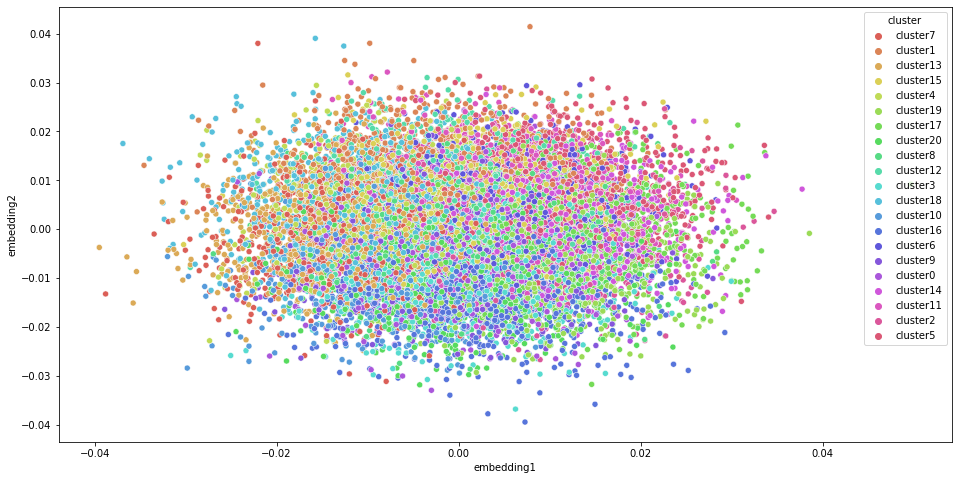

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=plot_rel_transE.embedding1,y=plot_rel_transE.embedding2,hue='cluster',palette=sns.color_palette("hls",21),data=plot_rel_transE,
               legend="full")
plt.show()

In [ ]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans

clustering_algorithm = KMeans(n_clusters=21, n_init=50, max_iter=500, random_state=0)
rel_clusters = find_clusters(relation, model, clustering_algorithm, mode='relation')

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
rel_embeddings_2d = PCA(n_components=2).fit_transform(np.array([i for i in relation_embeddings.values()]))

In [ ]:
plot_rel = pd.DataFrame({"relation": relation, 
                        "embedding1": rel_embeddings_2d[:, 0], 
                        "embedding2": rel_embeddings_2d[:, 1],
                        "cluster": "cluster" + pd.Series(rel_clusters).astype(str)})

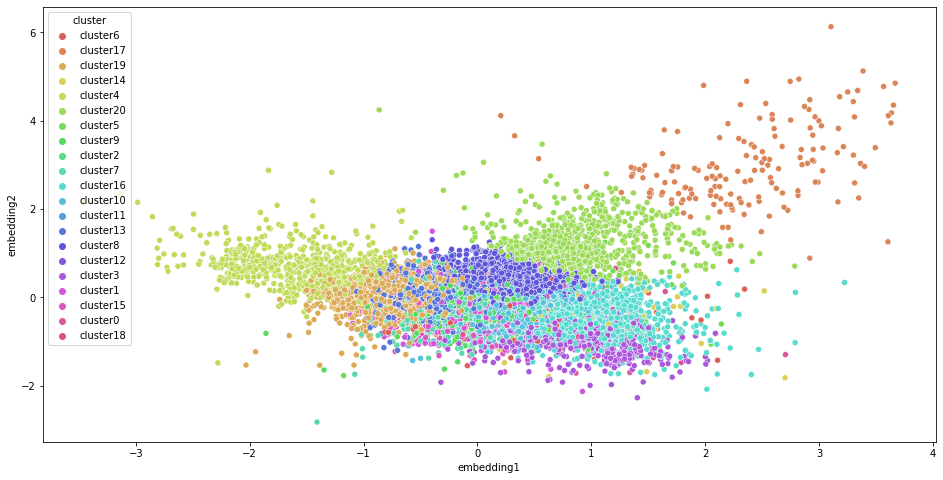

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=plot_rel.embedding1,y=plot_rel.embedding2,hue='cluster',palette=sns.color_palette("hls",21),data=plot_rel,
               legend="full")
plt.show()

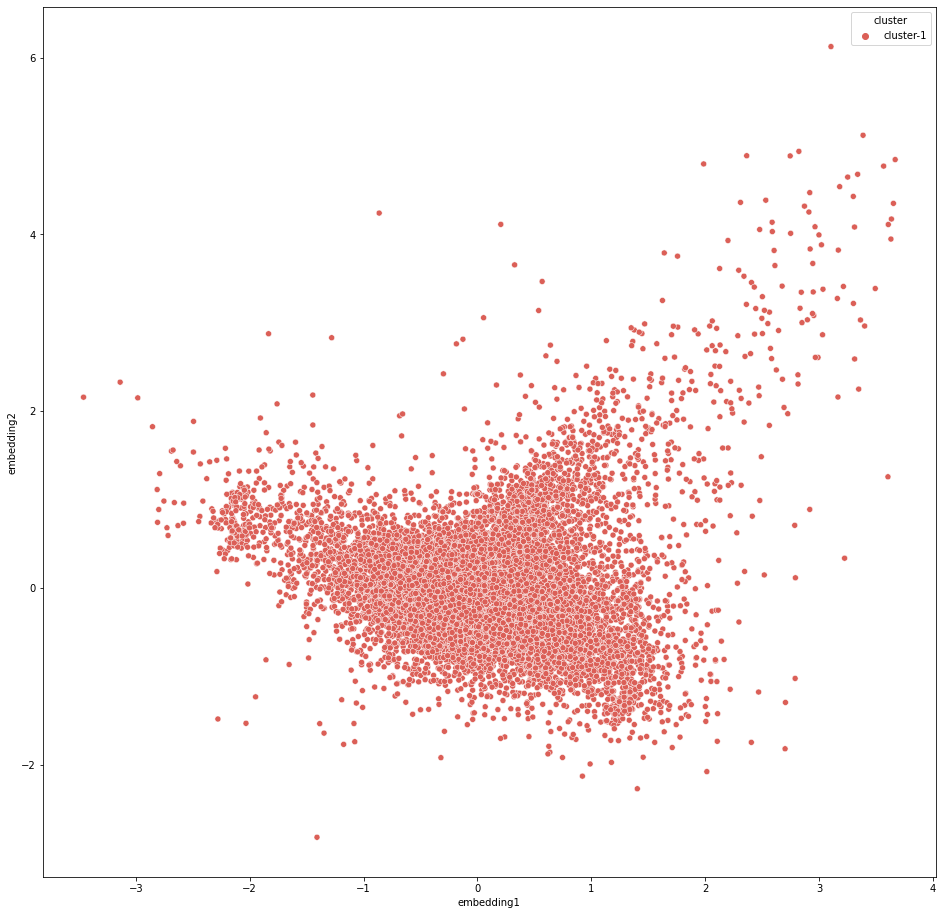

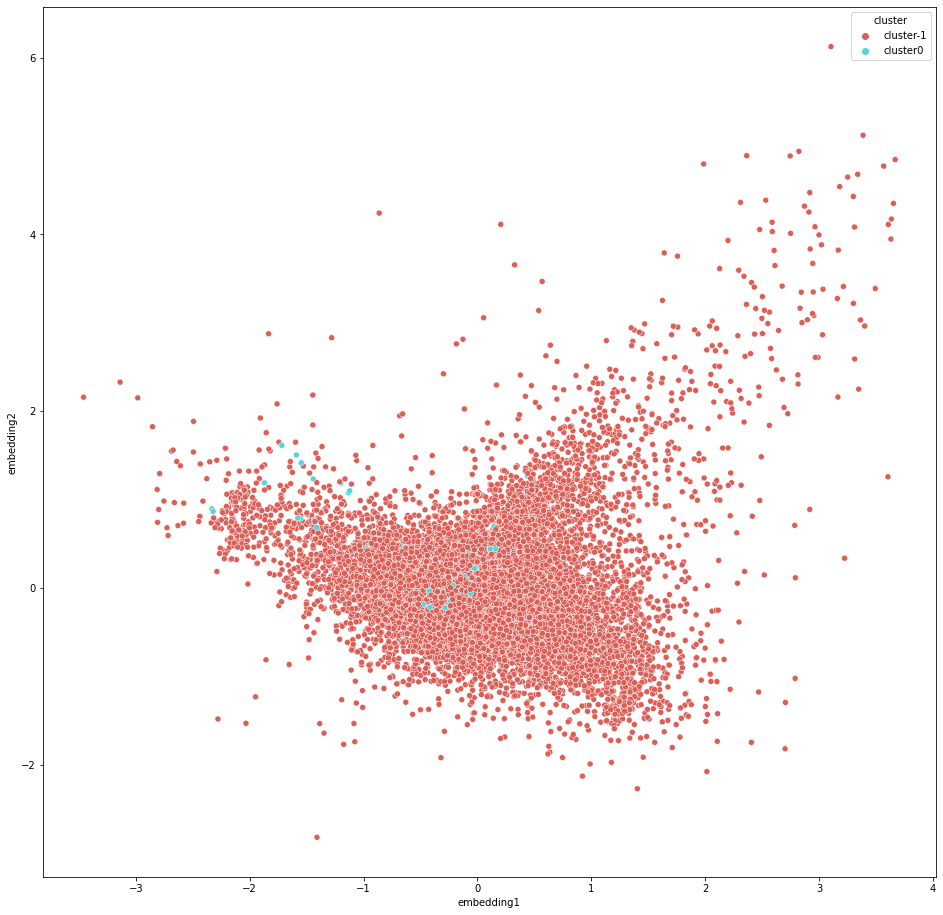

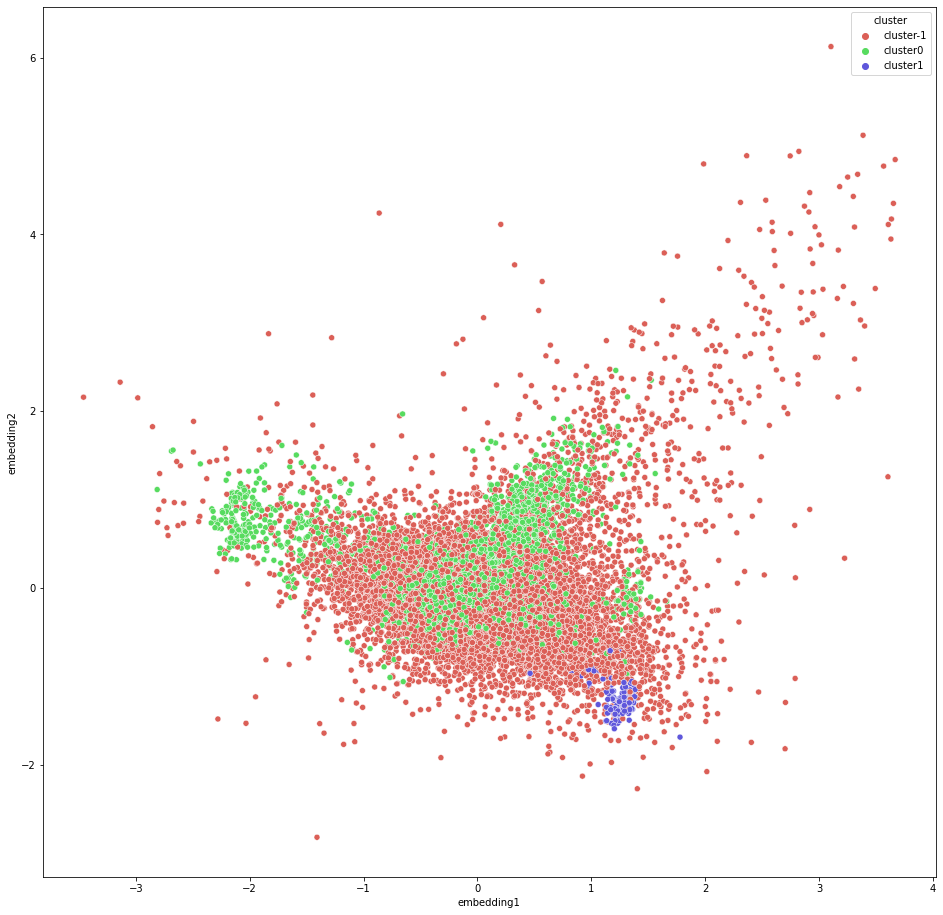

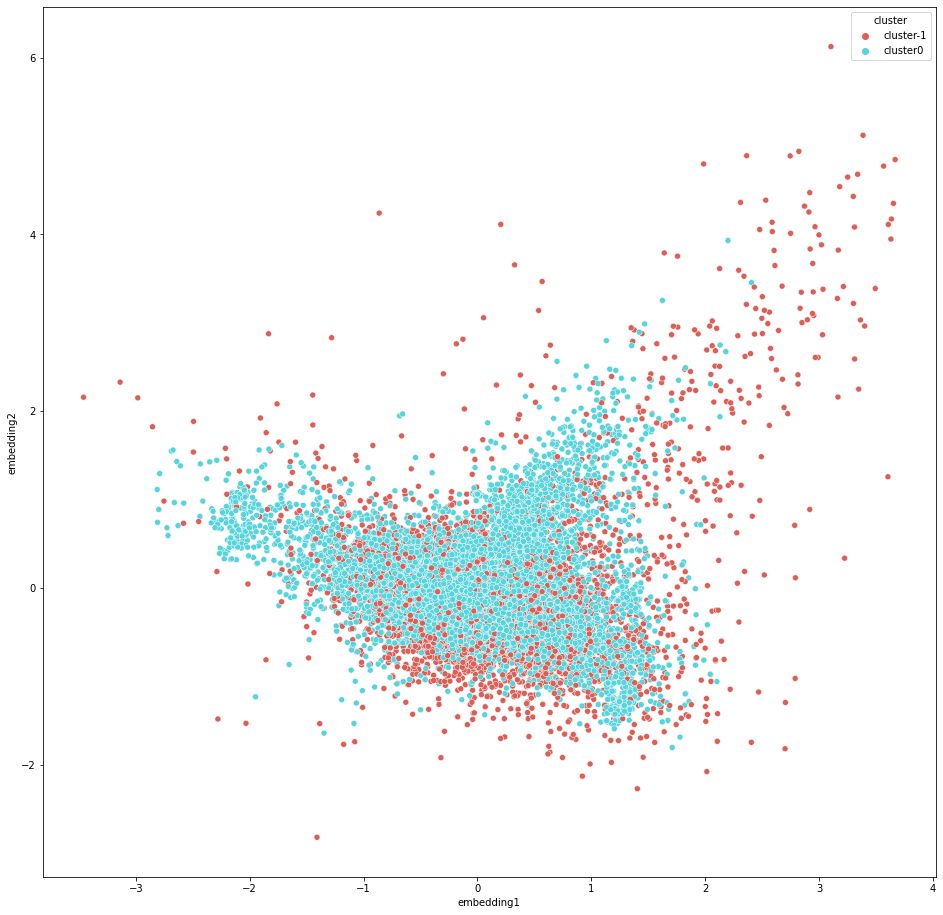

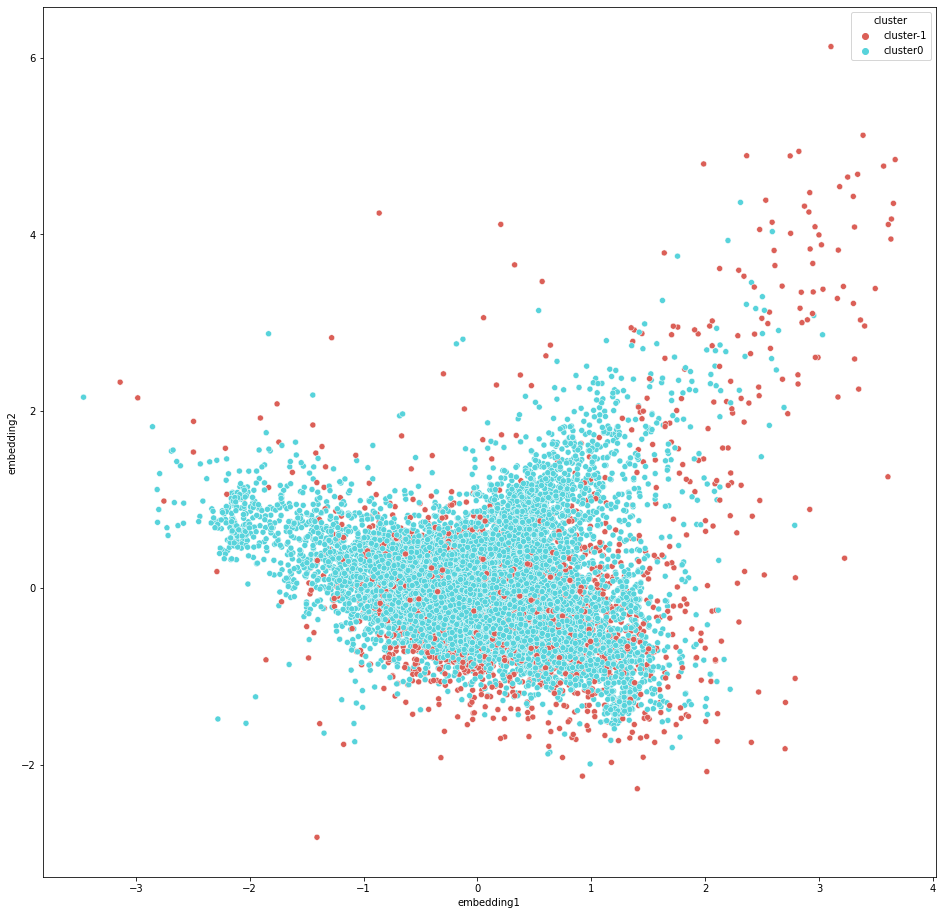

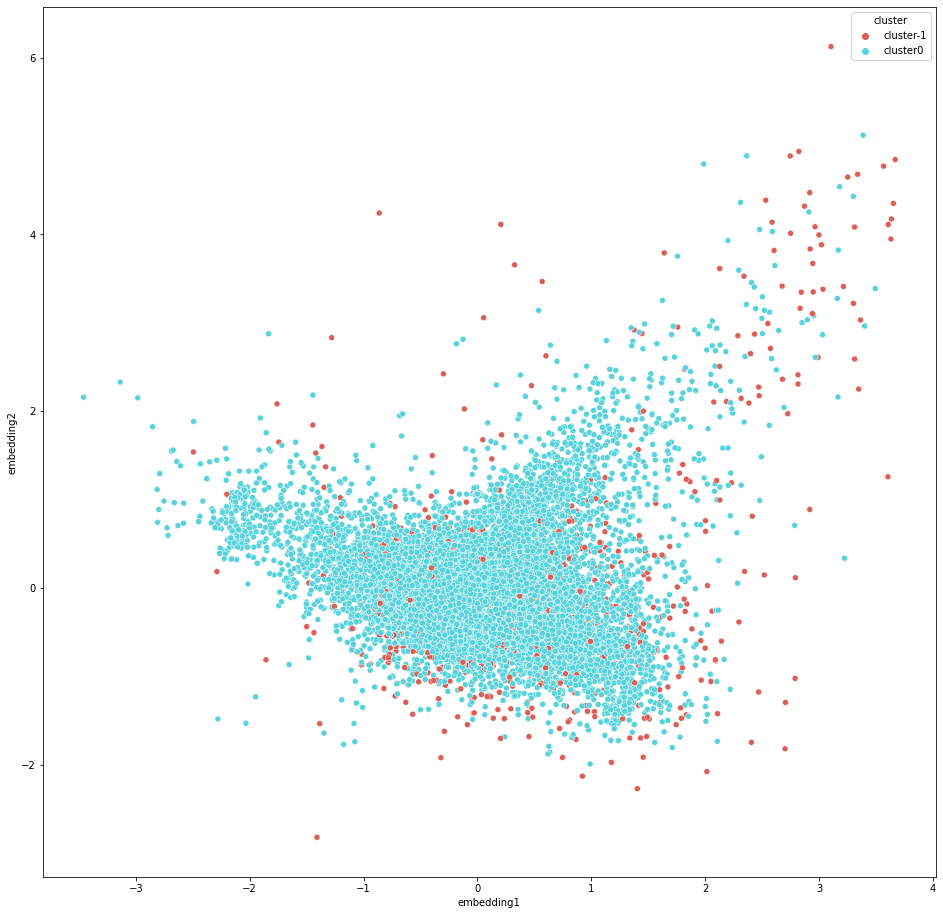

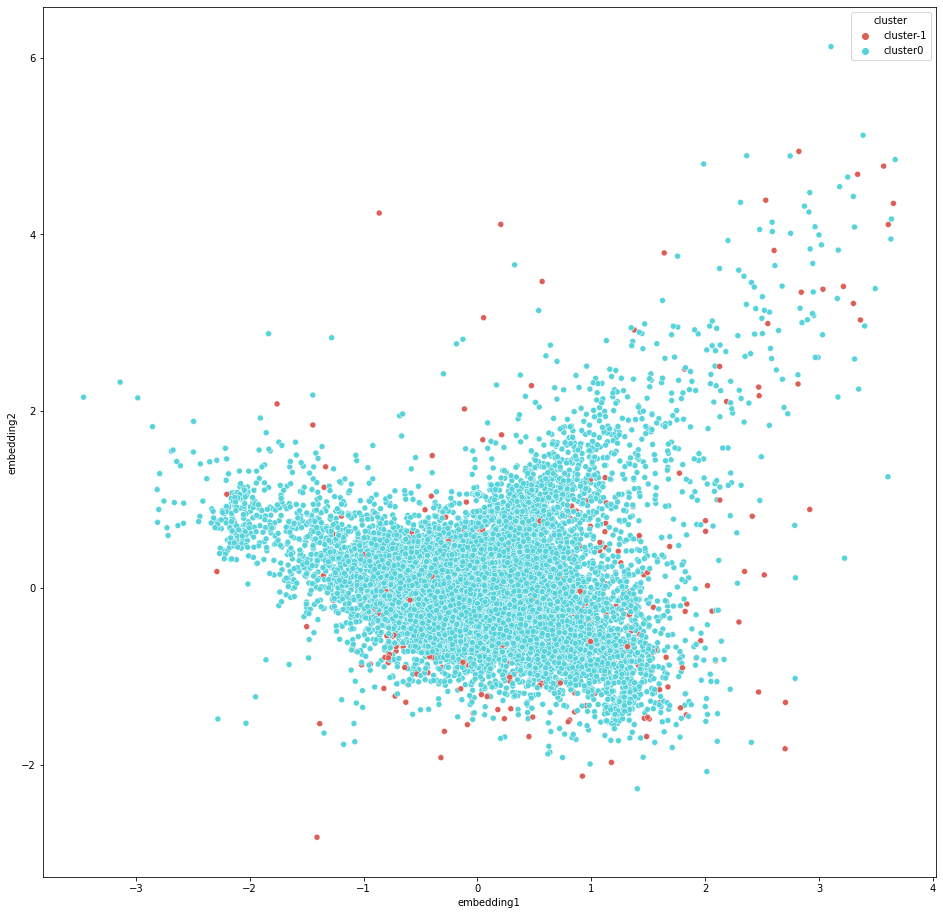

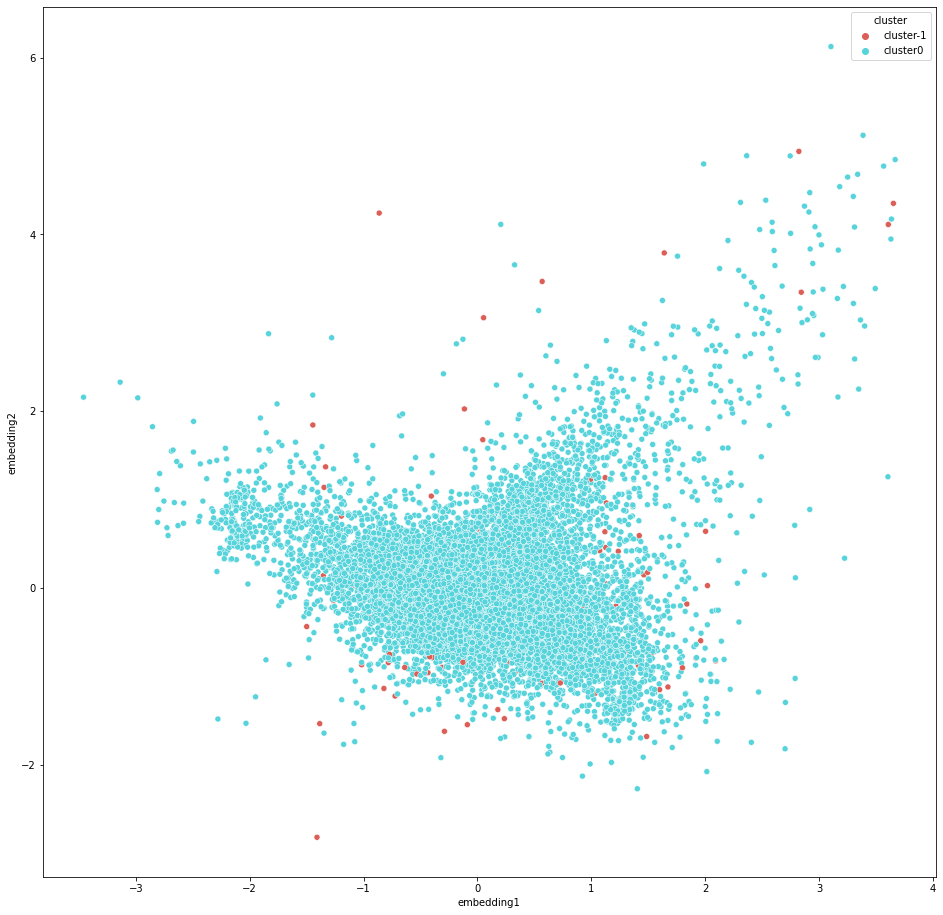

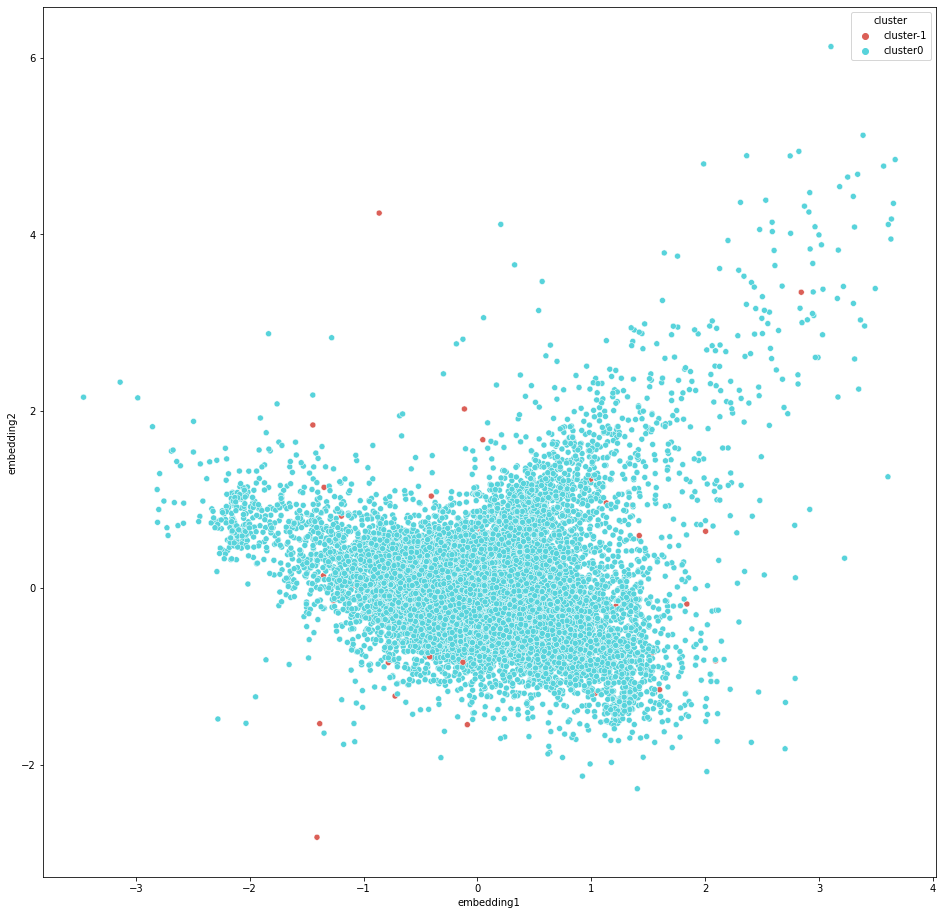

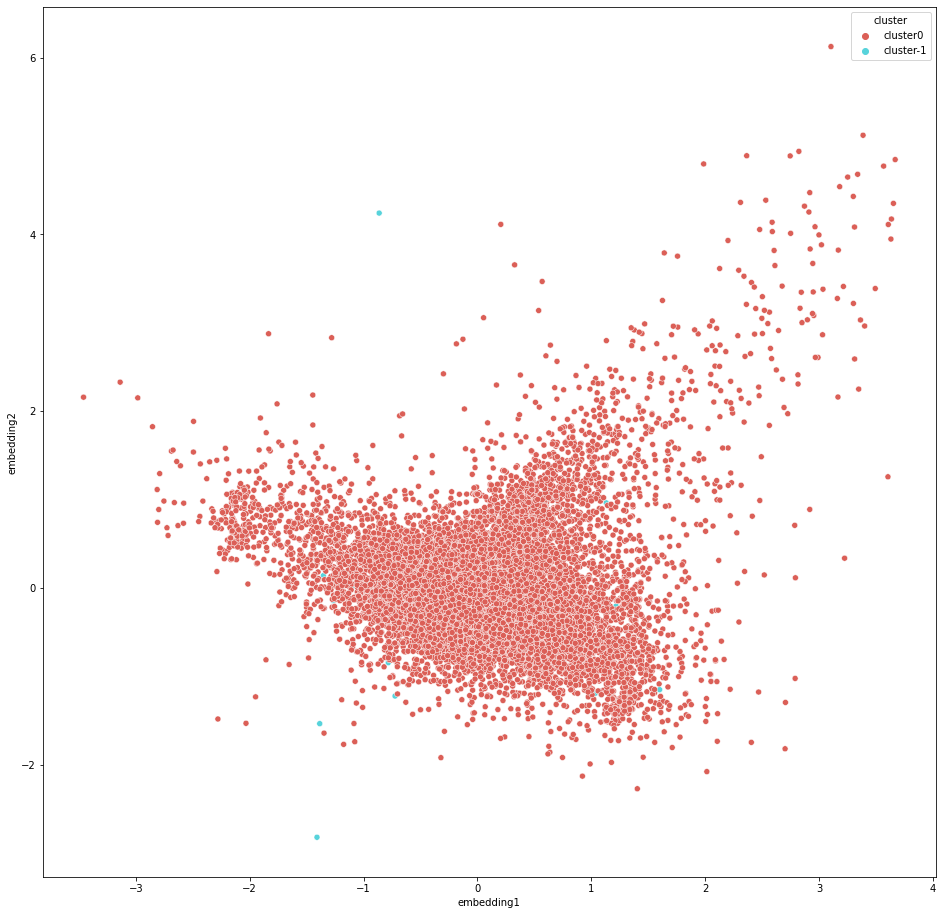

In [ ]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import DBSCAN

for i in range(1,11):
  dbscan = DBSCAN(eps=i, min_samples=100)
  rel_dbscan = find_clusters(relation, model, dbscan, mode='relation')

  plot_dbscan = pd.DataFrame({"relation": relation, 
                          "embedding1": rel_embeddings_2d[:, 0], 
                          "embedding2": rel_embeddings_2d[:, 1],
                          "cluster": "cluster" + pd.Series(rel_dbscan).astype(str)})

  cluster_num = plot_dbscan.cluster.nunique()

  plt.figure(figsize=(16,16))
  sns.scatterplot(x=plot_dbscan.embedding1,y=plot_dbscan.embedding2,hue='cluster',palette=sns.color_palette("hls",cluster_num),data=plot_dbscan,
                legend="full")
  plt.show()

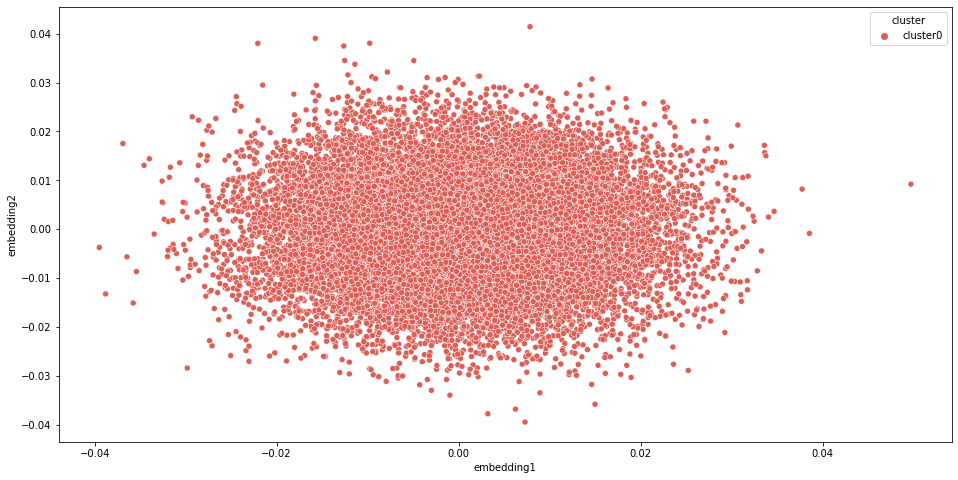

In [144]:
dbscan = DBSCAN(eps=15, min_samples=50)
rel_dbscan = find_clusters(relation, transE_unique, dbscan, mode='relation')

rel_transE_embeddings_2d = PCA(n_components=2).fit_transform(np.array([i for i in rel_transE_embeddings.values()]))

plot_dbscan = pd.DataFrame({"relation": relation, 
                        "embedding1": rel_transE_embeddings_2d[:, 0], 
                        "embedding2": rel_transE_embeddings_2d[:, 1],
                        "cluster": "cluster" + pd.Series(rel_dbscan).astype(str)})

cluster_num = plot_dbscan.cluster.nunique()

plt.figure(figsize=(16,8))
sns.scatterplot(x=plot_dbscan.embedding1,y=plot_dbscan.embedding2,hue='cluster',palette=sns.color_palette("hls",cluster_num),data=plot_dbscan,
              legend="full")
plt.show()

In [ ]:
for i in range(1,11):
  dbscan = DBSCAN(eps=i, min_samples=50)
  rel_dbscan = find_clusters(relation, model, dbscan, mode='relation')

  plot_dbscan = pd.DataFrame({"relation": relation, 
                          "embedding1": rel_embeddings_2d[:, 0], 
                          "embedding2": rel_embeddings_2d[:, 1],
                          "cluster": "cluster" + pd.Series(rel_dbscan).astype(str)})

  cluster_num = plot_dbscan.cluster.nunique()

  plt.figure(figsize=(16,8))
  sns.scatterplot(x=plot_dbscan.embedding1,y=plot_dbscan.embedding2,hue='cluster',palette=sns.color_palette("hls",cluster_num),data=plot_dbscan,
                legend="full")
  plt.show()

In [ ]:
plot_rel

relation  embedding1  embedding2    cluster
0                              are   -0.088588   -1.548050   cluster6
1                 are employees of    3.104619    6.126252  cluster17
2                    Secretary for   -1.064684    0.394228  cluster19
3                               is    0.353431    0.515118   cluster6
4                               ’s   -1.195066    0.812462  cluster14
...                            ...         ...         ...        ...
20557                served Within    0.017876   -0.231026  cluster10
20558    also receives grants from   -0.127655    0.293607  cluster13
20559           has received grant    0.901380   -0.038735   cluster8
20560  received lectgure fees from    1.214806   -0.650824  cluster16
20561      receives royalties with   -0.116876   -0.696318  cluster15

[20562 rows x 4 columns]

In [ ]:
plot_rel_transE

relation  embedding1  embedding2    cluster
0                              are   -0.038794   -0.013265   cluster7
1                 are employees of   -0.016218   -0.018814   cluster7
2                    Secretary for    0.001486    0.014144   cluster1
3                               is   -0.013188    0.011417  cluster13
4                               ’s   -0.004087    0.004583  cluster15
...                            ...         ...         ...        ...
20557                served Within    0.003794    0.003469   cluster8
20558    also receives grants from    0.006489   -0.001745  cluster16
20559           has received grant    0.021220    0.006160  cluster14
20560  received lectgure fees from    0.017103    0.002479   cluster6
20561      receives royalties with   -0.010025    0.000318  cluster13

[20562 rows x 4 columns]

In [ ]:
plot_rel.groupby('cluster').count()

relation  embedding1  embedding2
cluster                                    
cluster0        121         121         121
cluster1       1206        1206        1206
cluster10      2291        2291        2291
cluster11         4           4           4
cluster12         9           9           9
cluster13      4537        4537        4537
cluster14       146         146         146
cluster15       458         458         458
cluster16      1153        1153        1153
cluster17       160         160         160
cluster18         2           2           2
cluster19      2326        2326        2326
cluster2         19          19          19
cluster20       828         828         828
cluster3        631         631         631
cluster4        709         709         709
cluster5        224         224         224
cluster6        261         261         261
cluster7       1826        1826        1826
cluster8       2152        2152        2152
cluster9       1499        1499        1499

In [ ]:
complEx_map = plot_rel[['cluster', 'relation']]
complEx_map['relation'] = complEx_map.groupby(['cluster']).transform(lambda x : ', '.join(x))
complEx_map = complEx_map.drop_duplicates()
complEx_map

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


cluster                                           relation
0       cluster6  are, is, was funded by, has acted as, was, ser...
1      cluster17  are employees of, is consultant for, received ...
2      cluster19  Secretary for, grants outside, reports fees ou...
4      cluster14  ’s, is in, has undertaken, received funding fo...
5       cluster4  member for, will, approved, brought, revised m...
6      cluster20  grants from, fees from, received consultancy h...
8       cluster5  from grants is, reports, accepted, received, h...
10      cluster9  from Topcon is, reports grants during, is co-i...
11      cluster2  have, was approved by, had, was reviewed by, a...
14      cluster7  developed at, has filed patent applications on...
17     cluster16  accepted travel for, is Director of, providing...
18     cluster10  has undertaken research under, have read, are ...
20     cluster11  is with, patent for, Korean patent for, provis...
32     cluster13  Sechi per, providing marketing services to, is...
41      cluster8  of onset is, received funding in, University o...
42     cluster12  has, has pending, also has, However has, Addit...
43      cluster3  company with, was provided companies by, broug...
45      cluster1  has filed, is related to, are articulated in, ...
67     cluster15  participate in, provided support for, made, pr...
80      cluster0  served in, is on, been on, serves on, is non-e...
13426  cluster18      was obtained with, was obtained together with

In [ ]:
transE_map = plot_rel_transE[['cluster', 'relation']]
transE_map['relation'] = transE_map.groupby(['cluster']).transform(lambda x : ', '.join(x))
transE_map = transE_map.drop_duplicates()
transE_map

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


cluster                                           relation
0     cluster7  are, are employees of, is consultant for, acce...
2     cluster1  Secretary for, Sechi per, reports grants durin...
3    cluster13  is, grants from, from grants is, has undertake...
4    cluster15  ’s, is with, personal fees from, of onset is, ...
5     cluster4  member for, fees from, has, is owned enterpris...
9    cluster19  reports, accepted travel for, reports fees out...
10   cluster17  from Topcon is, is enterprise in, affiliated, ...
11   cluster20  have, have read, was scientist for, has receiv...
12    cluster8  is in, alter authors adherence to, hold, recei...
14   cluster12  developed at, received travel grants from, pro...
15    cluster3  was funded by, received funding for, has filed...
16   cluster18  has undertaken, received funding in, was, were...
21   cluster10  received, has received, served for, been on, a...
23   cluster16  received funding from, has acted as, grants ou...
25    cluster6  have received honoraria from, has filed, parti...
27    cluster9  will, received research funding from, received...
35    cluster0  received speakers honoraria from, received con...
39   cluster14  is Director of, provided support to, for inves...
43   cluster11  company with, is state owned enterprise in, br...
46    cluster2  providing, is related to, are as, funder of, w...
103   cluster5  is voluntary, alter, is Non-Executive Director...

In [ ]:
transE_map['most common'] = mostCommon(transE_map['relation'])
transE_common = transE_map.drop('relation', axis=1)

In [131]:
transE_common

cluster                                        most common
0     cluster7  [(received, 127), (research, 40), (fees, 30), ...
2     cluster1  [(received, 77), (support, 29), (grant, 27), (...
3    cluster13  [(received, 120), (support, 43), (receives, 31...
4    cluster15  [(received, 95), (research, 27), (fees, 22), (...
5     cluster4  [(received, 92), (research, 29), (support, 24)...
9    cluster19  [(received, 95), (research, 36), (support, 26)...
10   cluster17  [(received, 80), (research, 30), (fees, 21), (...
11   cluster20  [(received, 109), (research, 38), (support, 28...
12    cluster8  [(received, 80), (research, 22), (support, 22)...
14   cluster12  [(received, 85), (support, 25), (research, 24)...
15    cluster3  [(received, 104), (fees, 30), (funding, 27), (...
16   cluster18  [(received, 118), (support, 31), (research, 29...
21   cluster10  [(received, 145), (research, 38), (support, 33...
23   cluster16  [(received, 111), (research, 35), (receives, 2...
25    cluster6  [(received, 109), (research, 30), (support, 27...
27    cluster9  [(received, 92), (outside, 28), (research, 25)...
35    cluster0  [(received, 108), (research, 36), (support, 35...
39   cluster14  [(received, 85), (research, 30), (fees, 28), (...
43   cluster11  [(received, 99), (research, 30), (support, 29)...
46    cluster2  [(received, 84), (research, 26), (outside, 22)...
103   cluster5  [(received, 73), (research, 28), (support, 22)...

In [132]:
complEx_map['most common'] = mostCommon(complEx_map['relation'])
complEx_common = complEx_map.drop('relation', axis=1)

In [133]:
complEx_common

cluster                                        most common
0       cluster6  [(received, 36), (served, 16), (acted, 15), (f...
1      cluster17  [(received, 74), (research, 19), (fees, 18), (...
2      cluster19  [(received, 174), (outside, 115), (provided, 6...
4      cluster14  [(received, 68), (honoraria, 18), (fees, 18), ...
5       cluster4  [(received, 16), (support, 11), (funding, 11),...
6      cluster20  [(received, 287), (fees, 75), (research, 71), ...
8       cluster5  [(received, 89), (grants, 12), (reports, 11), ...
10      cluster9  [(received, 114), (support, 47), (provided, 38...
11      cluster2  [(applicable, 2), (provided, 2), (approved, 1)...
14      cluster7  [(received, 95), (outside, 78), (support, 33),...
17     cluster16  [(received, 148), (research, 45), (support, 33...
18     cluster10  [(received, 215), (research, 72), (funding, 59...
20     cluster11       [(patent, 3), (Korean, 1), (provisional, 1)]
32     cluster13  [(received, 249), (research, 101), (provided, ...
41      cluster8  [(received, 372), (research, 114), (fees, 83),...
42     cluster12  [(pending, 1), (Additionally, 1), (presents, 1...
43      cluster3  [(received, 45), (co, 16), (research, 13), (gr...
45      cluster1  [(received, 75), (research, 31), (support, 27)...
67     cluster15  [(obtained, 34), (received, 26), (provided, 17...
80      cluster0  [(member, 37), (served, 18), (serves, 7), (non...
13426  cluster18                                    [(obtained, 2)]

In [ ]:
import spacy
from collections import Counter

def mostCommon(corpus_list):
  common_list = []
  for corpus in corpus_list:
    nlp = spacy.load('en')
    doc = nlp(corpus)
    # all tokens that arent stop words or punctuations
    words = [token.text
            for token in doc
            if not token.is_stop and not token.is_punct]

    # five most common tokens
    word_freq = Counter(words)
    common_words = word_freq.most_common(15)

    common_list.append(common_words)
  return common_list

In [ ]:
ontology = pd.read_csv('/content/drive/MyDrive/AI in Health Conflict of Interest project/coi_gt_ontology.csv')
ontology

COI term               COI Desc  \
0                                 shareholder                  stock   
1                                      equity                  stock   
2                                         own              ownership   
3                                 proprietary              ownership   
4                                      patent              IP-patent   
5                       financial interest in                  stock   
6                                     manager  employment-management   
7                                      employ             employment   
8                                         CEO  employment-management   
9                                         CFO  employment-management   
10                                  president  employment-management   
11                                   inventor              IP-patent   
12                                     founde              ownership   
13                                  royalties           IP-royalties   
14                                      stock                  stock   
15                                      grant               research   
16                                       fund               research   
17                                    support               research   
18                                   contract               research   
19                                 collaborat               research   
20                                   research               research   
21                                     consul        consulting fees   
22                                       advi               advisory   
23                                    honrari          speaking fees   
24                                      speak          speaking fees   
25                                       talk          speaking fees   
26                                       edit             editorship   
27                                     travel            travel fees   
28                                     member               advisory   
29                                      panel               advisory   
30                                      board               advisory   
31                                    proctor               advisory   
32                                        fee        fee-unspecified   
33                               remuneration        fee-unspecified   
34            Any declaration of giving stuff               supplies   
35  Any sort of support that is not paid for           non-financial   
36                                    witness         expert witness   
37                                    lecture          speaking fees   
38                               investigator               research   
39                                   teaching            educational   
40                              participation        fee-unspecified   
41                                     trials               research   
42                                    Officer  employment-management   
43                                 conference          speaking fees   
44                               accomodation            travel fees   
45                                    trustee  employment-management   
46                                educational            educational   
47                                   director  employment-management   
48                             manuscript-fee              fee-other   
49                                   partners              ownership   
50                                    license           IP-royalties   
51                                      hired             employment   
52                                      award                  award   
53                                      chair          endowed chair   
54                                 associates             employment   
55   

In [ ]:
transE_map.to_csv('/content/drive/MyDrive/AI in Health Conflict of Interest project/transE_map.csv')
complEx_map.to_csv('/content/drive/MyDrive/AI in Health Conflict of Interest project/complEx_map.csv')

In [241]:
from collections import Counter
import spacy
nlp = spacy.load('en')



term = []
for desc in ontology['COI Desc'].unique():
  term.append(list(ontology[ontology['COI Desc']==desc]['COI term']))
ont = dict(zip(ontology['COI Desc'].unique(), term))

df = []

for corpus in complEx_map.relation:
  doc = nlp(corpus)

  words = []
  for word in doc:
    words.append(word.lemma_)

  occ = dict(Counter(words))

  ont_count = []

  for icmje in ont.keys():
    sum = 0
    for rel in occ.keys():
      if rel in ont.get(icmje):
        sum+= occ.get(rel)
    ont_count.append(sum)
  
  df.append(ont_count)


In [197]:
occ_count

[9, 7, 25, 5, 6, 3, 140, 0, 13, 12, 0, 7, 38, 0, 0, 2, 1, 0, 3, 4, 0]

In [203]:
df

[[9, 7, 25, 5, 6, 3, 140, 0, 13, 12, 0, 7, 38, 0, 0, 2, 1, 0, 3, 4, 0],
 [2, 1, 13, 10, 4, 4, 117, 0, 14, 10, 1, 6, 29, 0, 0, 1, 1, 0, 1, 6, 0],
 [7, 9, 16, 10, 12, 2, 151, 0, 28, 8, 0, 13, 27, 0, 0, 3, 3, 0, 2, 2, 0],
 [7, 4, 14, 5, 6, 3, 114, 0, 11, 10, 1, 12, 26, 0, 0, 3, 1, 0, 6, 4, 0],
 [8, 4, 13, 7, 5, 1, 118, 0, 21, 10, 1, 12, 28, 0, 0, 1, 1, 0, 0, 6, 0],
 [3, 5, 17, 7, 5, 6, 131, 0, 11, 15, 0, 15, 29, 0, 0, 2, 4, 0, 3, 3, 0],
 [5, 3, 9, 6, 10, 3, 113, 0, 10, 8, 1, 4, 29, 0, 0, 1, 2, 0, 2, 3, 0],
 [6, 4, 19, 5, 10, 6, 142, 0, 21, 10, 1, 8, 30, 0, 0, 1, 1, 0, 4, 6, 0],
 [9, 2, 16, 8, 4, 2, 96, 0, 16, 11, 1, 7, 18, 0, 0, 2, 0, 0, 1, 3, 0],
 [9, 3, 16, 6, 7, 4, 104, 0, 12, 12, 0, 10, 22, 0, 0, 0, 2, 0, 1, 0, 0],
 [13, 2, 12, 11, 3, 4, 98, 0, 15, 14, 0, 11, 37, 0, 0, 2, 0, 0, 5, 5, 0],
 [8, 2, 9, 11, 1, 4, 143, 0, 22, 10, 0, 11, 29, 0, 0, 2, 1, 0, 3, 5, 0],
 [14, 5, 12, 11, 4, 4, 151, 0, 12, 9, 0, 13, 34, 0, 0, 3, 0, 0, 4, 1, 0],
 [12, 5, 15, 3, 3, 4, 130, 0, 17, 11, 0, 6, 27, 0, 0,

In [242]:
df

[[1, 0, 0, 0, 5, 0, 40, 0, 7, 0, 0, 0, 13, 0, 0, 0, 0, 0, 1, 1, 0],
 [5, 1, 0, 0, 5, 0, 61, 0, 2, 5, 0, 10, 18, 0, 0, 0, 0, 0, 0, 0, 0],
 [13, 14, 35, 13, 6, 14, 262, 0, 30, 27, 0, 25, 57, 0, 0, 9, 6, 0, 10, 9, 0],
 [0, 0, 1, 0, 0, 0, 37, 0, 0, 0, 0, 8, 19, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 6, 5, 3, 1, 41, 0, 7, 2, 0, 2, 7, 0, 0, 0, 0, 0, 3, 3, 0],
 [28, 7, 4, 2, 10, 3, 259, 0, 23, 32, 0, 30, 97, 0, 0, 0, 0, 0, 2, 1, 0],
 [0, 0, 1, 1, 0, 0, 32, 0, 0, 3, 0, 2, 5, 0, 0, 0, 2, 0, 1, 0, 0],
 [4, 4, 19, 12, 8, 4, 212, 0, 13, 14, 1, 6, 43, 0, 0, 4, 0, 0, 5, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [5, 3, 25, 5, 5, 7, 164, 0, 13, 15, 0, 9, 33, 0, 0, 1, 0, 0, 4, 2, 0],
 [17, 1, 22, 31, 11, 4, 148, 0, 21, 19, 0, 12, 38, 0, 0, 3, 0, 0, 5, 10, 0],
 [14, 11, 37, 34, 16, 12, 234, 0, 42, 21, 2, 18, 43, 0, 0, 7, 2, 0, 10, 12, 0],
 [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [28, 16, 74, 19, 14, 17, 436, 0, 59, 33, 4, 18, 68, 0, 0, 4, 10, 0, 12, 7,

In [243]:
idx = []

for i in complEx_map.cluster:
  idx.append(int(i.replace('cluster', "")))

idx

[6, 17, 19, 14, 4, 20, 5, 9, 2, 7, 16, 10, 11, 13, 8, 12, 3, 1, 15, 0, 18]

In [244]:
df2 = pd.DataFrame(df, columns=ont.keys())
df2['cluster'] = idx
df2.set_index('cluster', inplace=True)

In [247]:
df3 = df2.sort_index().style.highlight_max(color = 'green', axis = 0)
df3

In [240]:
df2.to_csv('/content/drive/MyDrive/AI in Health Conflict of Interest project/transEmap.csv')

In [237]:
html = df3.render()
images_dir = '/content/drive/MyDrive/AI in Health Conflict of Interest project/'

import imgkit
imgkit.from_string(html, '/content/drive/MyDrive/AI in Health Conflict of Interest project/transEmap.png')

OSError: ignored

In [238]:
import numpy as np
import pandas as pd
import dataframe_image as dfi

dfi.export(df3, '/content/drive/MyDrive/AI in Health Conflict of Interest project/transEmap.png')

OSError: ignored

In [160]:
term = []
for desc in ontology['COI Desc'].unique():
  term.append(list(ontology[ontology['COI Desc']==desc]['COI term']))
ont = dict(zip(ontology['COI Desc'].unique(), term))

In [198]:
ont.keys()

dict_keys(['stock', 'ownership', 'IP-patent', 'employment-management', 'employment', 'IP-royalties', 'research', 'consulting fees', 'advisory', 'speaking fees', 'editorship', 'travel fees', 'fee-unspecified', 'supplies', 'non-financial', 'expert witness', 'educational', 'fee-other', 'award', 'endowed chair', 'IP-other'])

In [183]:
ont.get('research')

['grant',
 'fund',
 'support',
 'contract',
 'collaborat',
 'research',
 'investigator',
 'trials']

In [178]:
occ.keys()

dict_keys(['be', ',', 'employee', 'of', 'consultant', 'for', 'accept', 'have', 'receive', 'research', 'grant', 'from', 'provide', 'support', 'in', 'serve', 'as', 'currently', 'employ', 'by', 'hold', 'property', 'present', 'President', 'previously', 'conduct', 'study', 'on', 'share', 'PI', 'influence', 'talk', 'advisory', 'funding', 'would', 'like', 'involve', 'comply', 'with', 'fee', 'give', 'conform', 'to', 'inform', 'regard', 'sign', 'hospital', 'honoraria', 'consultancy', 'coinventor', 'membership', 'devoted', 'participate', 'carry', 'out', 'without', 'speaker', 'collaborate', 'guideline', 'under', 'academic', 'make', 'friend', 'University', 'declare', 'experience', 'author', 'industrial', 'student', 'at', 'partially', 'fund', 'apply', 'prepare', 'during', 'member', 'relationship', 'within', 'work', "'s", 'Guide', 'gift', 'patent', 'travel', 'expense', 'current', 'acquire', 'trademark', 'license', 'nothing', 'take', 'belong', 'salary', 'reimbursement', 'receiverd', 'module', 'inform

In [130]:
words.value_counts()

AttributeError: ignored